# `Project Description – Bike Sharing Revenue understanding`

## `Project details`

### `Company: BoomBikes`

### `Background & Context:`

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider ***BoomBikes*** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### `Objective:`

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### `Business Goal:`

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### `Domain` 
- Bike Sharing industry 

### `Points to consider` 
#### Data Preparation:
1. You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
2. You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

#### Model Building:
1. In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

#### Model Building:
1. When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the lines of code provided in the UpGrad assignment section to calculate the R-squared score on the test set.

### `Datasets and Attributes Information:`

`Data Dictionary - "day.csv"`

* Attributes
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### `Learning Outcomes and Steps and tasks:`

#### Perform an Exploratory Data Analysis on the data
- Univariate analysis
- Bivariate analysis
- Use appropriate visualizations to identify the patterns and insights
- Any other exploratory deep dive

#### Illustrate the insights based on EDA
- Key meaningful observations on the relationship between variables

#### Data Pre-processing
- Prepare the data for analysis
- Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering
- Prepare data for modeling

#### Model building - Linear Regression
- Make a linear regression model
- Improve model performance

#### Model performance
- Compare the model performance of all the models

#### Actionable Insights & Recommendations
- Business recommendations and insights


## Import libraries

- Import the libraries for the project.

### Importing libraries for performing the data building, model building, model tuning and performance evaluation

In [1]:
# to manage error's display
import warnings # ignore the messages for plots
warnings.filterwarnings('ignore')

In [2]:
# Load the libraries 
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
from time import time

In [3]:
# import for performing the machine learning

# import library from sklearn for performing data split
from sklearn.model_selection import train_test_split

# import library from sklearn for performing linear regression
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import library from sklearn for performing scaling
from sklearn.preprocessing import MinMaxScaler

# import library from sklearn for RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# import library from sklearn for r2_score
from sklearn.metrics import r2_score

# Remove scientific notations and display numbers with 4 decimal points instead
pd.options.display.float_format = '{:,.4f}'.format

## Reading and Understanding Dataset

- Import the libraries, load dataset, the print shape of data, data description.

In [4]:
#Importing dataset from the csv file
bike = pd.read_csv('day.csv')

In [5]:
# check the datatype
type(bike)

pandas.core.frame.DataFrame

In [6]:
# print the shape of the uploaded data
print('*******************DataSet Shape************************')
bike.shape

*******************DataSet Shape************************


(730, 16)

In [7]:
# Check columns in the dataset and create a panada indexes
bike_cols = bike.columns
bike_cols

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# View the first ten entries of the data
bike.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   
7        8  08-01-2018       1   0     1        0        6           0   
8        9  09-01-2018       1   0     1        0        0           0   
9       10  10-01-2018       1   0     1        0        1           1   

   weathersit    temp   atemp     hum  windspeed  casual  registered   cnt  
0           2 14.1108 18.1812 80.5833    10.7499     331         654   985  
1           2 14.9026 17.6869 69.6087    16.6521     131         670   801  
2           1  8.0509  9.4703 43.7273    16.6367     120        1229  1349  
3           1  8.2000 10.6061 59.0435    10.7398     108        1454  1562  
4           1  9.3052 11.4635 43.6957    12.5223      82        1518  1600  
5           1  8.3783 11.6605 51.8261     6.0009      88        1518  1606  
6           2  8.0574 10.4420 49.8696    11.3046     148        1362  1510  
7           2  6.7650  8.1127 53.5833    17.8759      68         891   959  
8           1  5.6717  5.8087 43.4167    24.2507      54         768   822  
9           1  6.1842  7.5444 48.2917    14.9589      41        1280  1321

In [9]:
# get the infor regrading the dataset to check for information regarding the data
print('*******************Dataset Info*************************')
bike.info()

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


`Datasets and Attributes Information based on the data and understanding:`

`Data Dictionary`

* The dataset doesn't show any columns with null values
* dteday column type is object which will require to be changed to right data type
* All other columns are either data type int64 or float64. These data types could be kept as-is. 
* As we go through the project we can check if anything is required to be done on these columns
* Some of the columns are categorical columns and will require to be processes as per the needs of the machine learning model

`Insights on data:`

- This data will help the company to better understand patterns which might be affecting the demand hence the revenue of the company

`This data can help us define the key questions as below:`

1. What steps should company take to improve their approach?
2. Based on analysis, a company can understand which days are good or bad, hence which area needs more improvement?

In [10]:
# Use the command to get information for numerical columns
print('*********************Describe***************************')
bike.describe()

*********************Describe***************************


instant   season       yr     mnth  holiday  weekday  workingday  \
count 730.0000 730.0000 730.0000 730.0000 730.0000 730.0000    730.0000   
mean  365.5000   2.4986   0.5000   6.5260   0.0288   2.9973      0.6836   
std   210.8771   1.1102   0.5003   3.4502   0.1673   2.0062      0.4654   
min     1.0000   1.0000   0.0000   1.0000   0.0000   0.0000      0.0000   
25%   183.2500   2.0000   0.0000   4.0000   0.0000   1.0000      0.0000   
50%   365.5000   3.0000   0.5000   7.0000   0.0000   3.0000      1.0000   
75%   547.7500   3.0000   1.0000  10.0000   0.0000   5.0000      1.0000   
max   730.0000   4.0000   1.0000  12.0000   1.0000   6.0000      1.0000   

       weathersit     temp    atemp      hum  windspeed     casual  \
count    730.0000 730.0000 730.0000 730.0000   730.0000   730.0000   
mean       1.3945  20.3193  23.7263  62.7652    12.7636   849.2493   
std        0.5448   7.5067   8.1503  14.2376     5.1958   686.4799   
min        1.0000   2.4243   3.9535   0.0000     1.5002     2.0000   
25%        1.0000  13.8119  16.8897  52.0000     9.0417   316.2500   
50%        1.0000  20.4658  24.3682  62.6250    12.1253   717.0000   
75%        2.0000  26.8806  30.4458  72.9896    15.6256 1,096.5000   
max        3.0000  35.3283  42.0448  97.2500    34.0000 3,410.0000   

       registered        cnt  
count    730.0000   730.0000  
mean   3,658.7575 4,508.0068  
std    1,559.7587 1,936.0116  
min       20.0000    22.0000  
25%    2,502.2500 3,169.7500  
50%    3,664.5000 4,548.5000  
75%    4,783.2500 5,966.0000  
max    6,946.0000 8,714.0000

- The weather situation has no value of 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- We will visualize the data to get better ideas of the dataset

In [11]:
# look at the unique values in each columns but main one required is the airline_sentiment
print('******************Number of unique values per column***********************')
for col in bike:
    print(col)
    print(bike[col].nunique())

******************Number of unique values per column***********************
instant
730
dteday
730
season
4
yr
2
mnth
12
holiday
2
weekday
7
workingday
2
weathersit
3
temp
498
atemp
689
hum
594
windspeed
649
casual
605
registered
678
cnt
695


### Feature Engineering and Data processing steps

- Changing the data types of columns is required
- Processing the data in columns to fix discrepancies is required

In [12]:
# Convert the variable dteday datetime format
bike["dteday"] = pd.to_datetime(bike["dteday"])

In [13]:
# View the first ten entries of the data
bike.head(10)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-02-01       1   0     1        0        0           0   
2        3 2018-03-01       1   0     1        0        1           1   
3        4 2018-04-01       1   0     1        0        2           1   
4        5 2018-05-01       1   0     1        0        3           1   
5        6 2018-06-01       1   0     1        0        4           1   
6        7 2018-07-01       1   0     1        0        5           1   
7        8 2018-08-01       1   0     1        0        6           0   
8        9 2018-09-01       1   0     1        0        0           0   
9       10 2018-10-01       1   0     1        0        1           1   

   weathersit    temp   atemp     hum  windspeed  casual  registered   cnt  
0           2 14.1108 18.1812 80.5833    10.7499     331         654   985  
1           2 14.9026 17.6869 69.6087    16.6521     131         670   801  
2           1  8.0509  9.4703 43.7273    16.6367     120        1229  1349  
3           1  8.2000 10.6061 59.0435    10.7398     108        1454  1562  
4           1  9.3052 11.4635 43.6957    12.5223      82        1518  1600  
5           1  8.3783 11.6605 51.8261     6.0009      88        1518  1606  
6           2  8.0574 10.4420 49.8696    11.3046     148        1362  1510  
7           2  6.7650  8.1127 53.5833    17.8759      68         891   959  
8           1  5.6717  5.8087 43.4167    24.2507      54         768   822  
9           1  6.1842  7.5444 48.2917    14.9589      41        1280  1321

In [14]:
# get the infor regrading the dataset to check for information regarding the data
print('*******************Dataset Info*************************')
bike.info()

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 n

## <a id='link2'>Data Visualization</a>
<font color=darkblue> Adding color to the fonts in this section as it is about data visualization

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Univariate and Bivariate Analysis
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Univariate Analysis

<font color=darkblue> Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.

<font color=darkblue>
    
* The plot displayed below is called as a Histogram or Districution plots
    
* The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

* The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

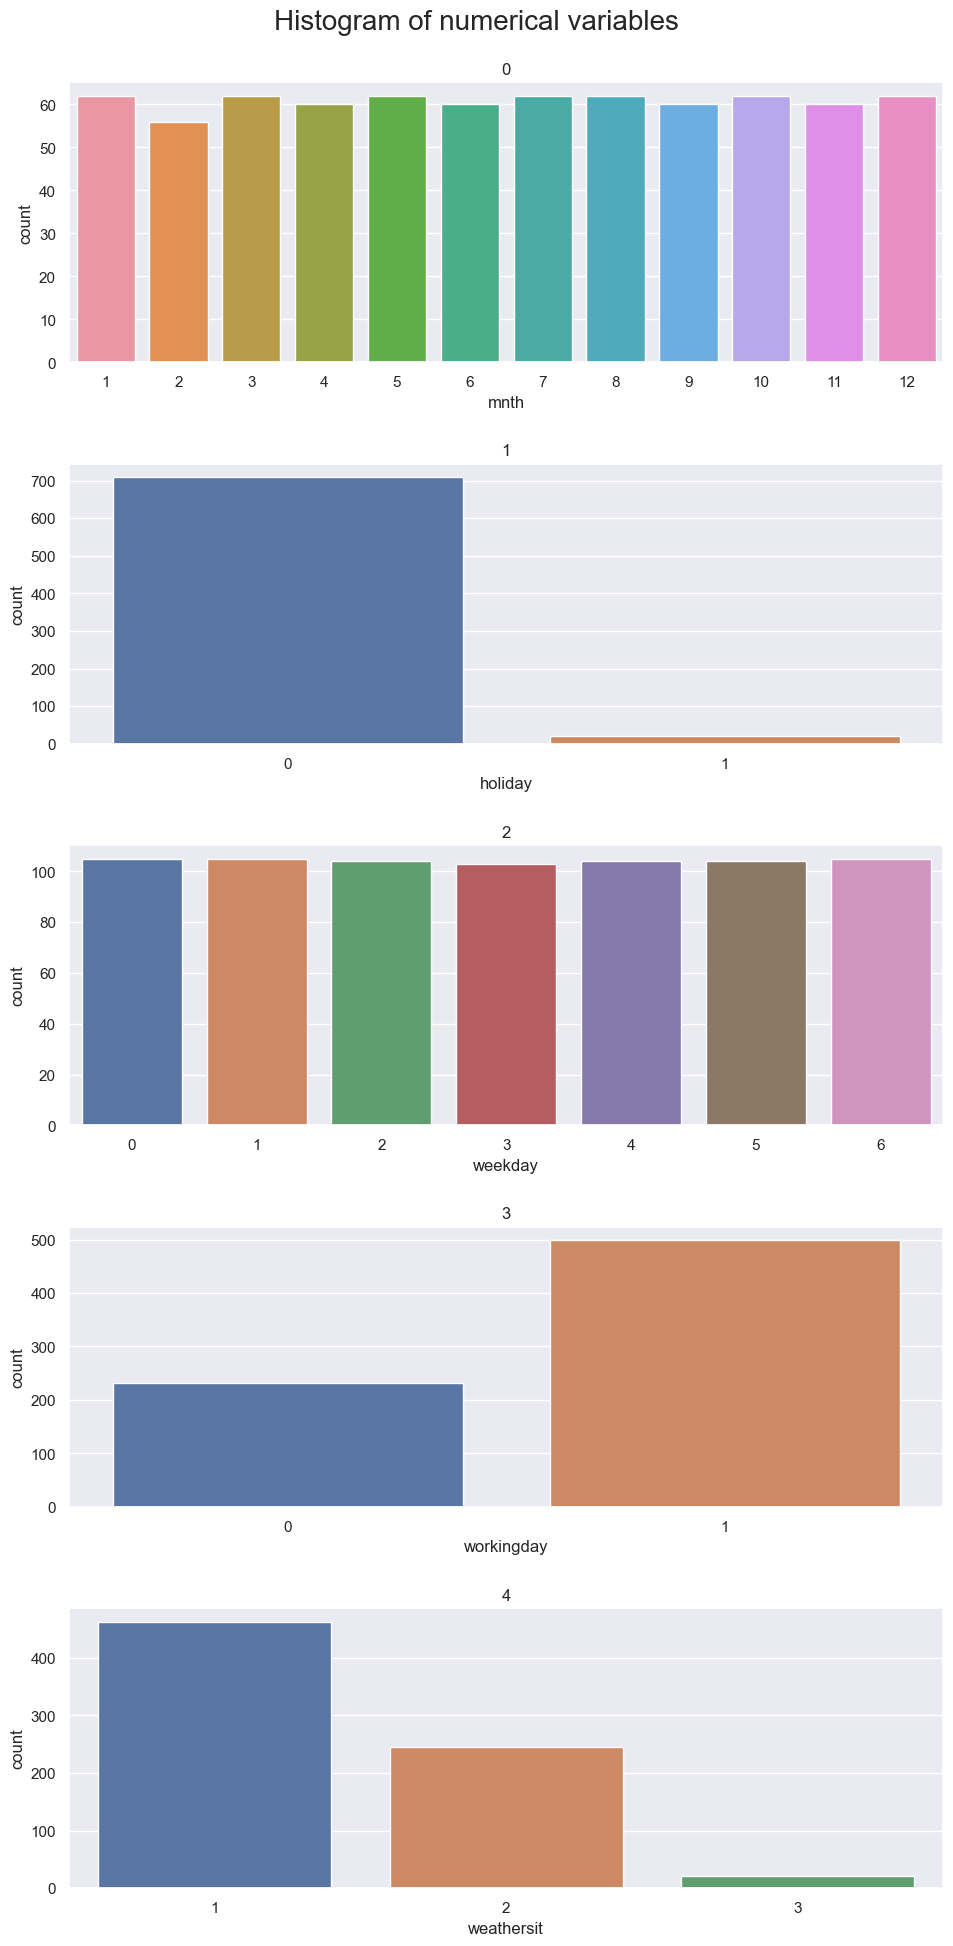

In [15]:
# Histogram plots for finding patterns with dates and weather situation
all_col = bike.iloc[:,4:].columns.tolist()
fig, axes = plt.subplots(5, 1,  figsize=(10, 20))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=bike[all_col[counter]])
    axes[ii].set_title(ii)
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**
- The overall feature are quite uniformly distributed
- There is no major point which is showing up

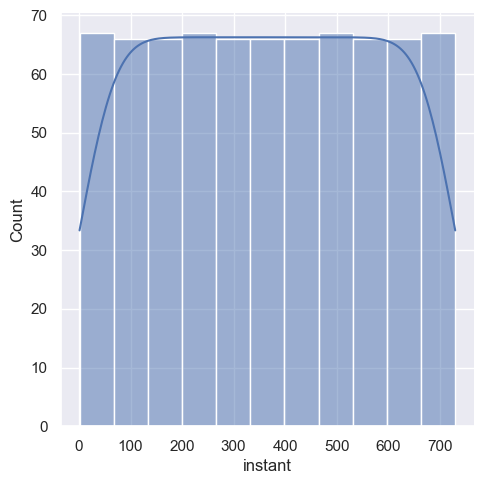

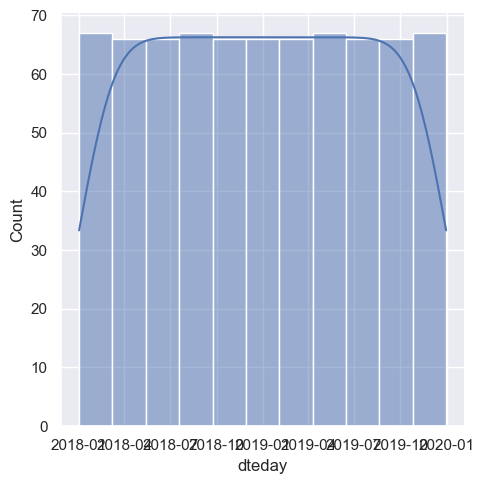

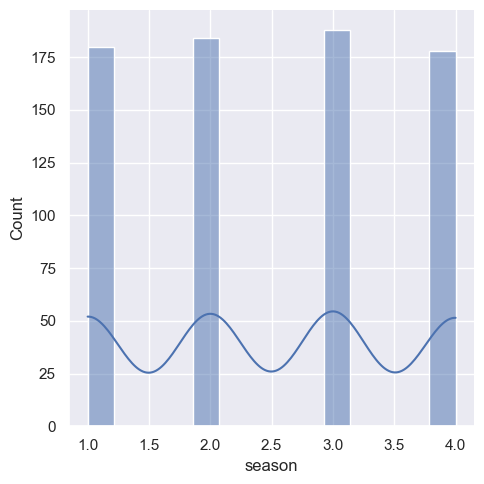

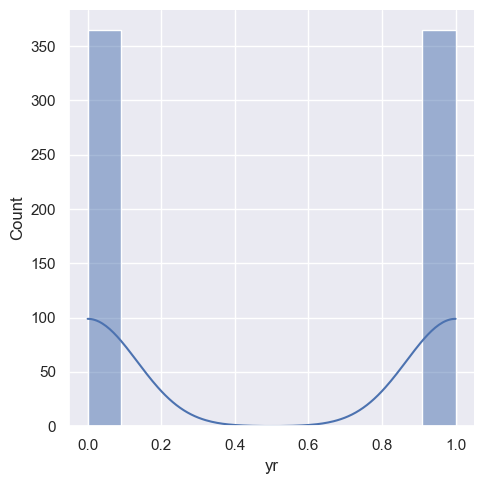

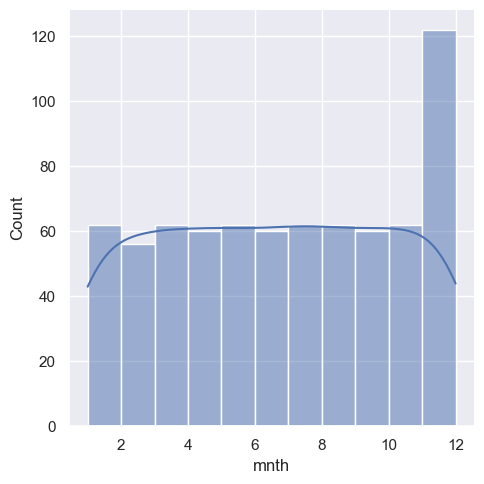

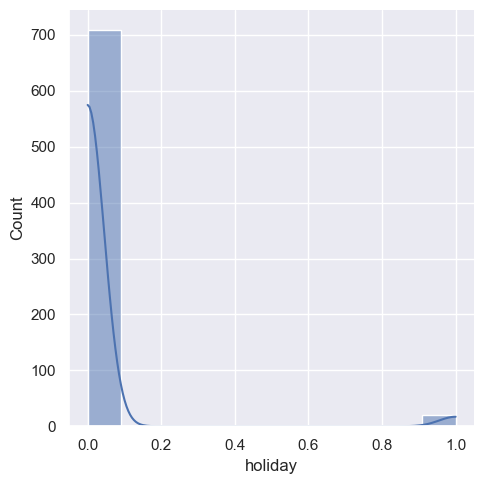

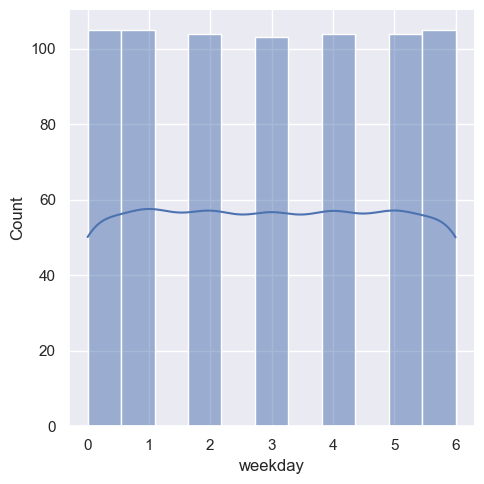

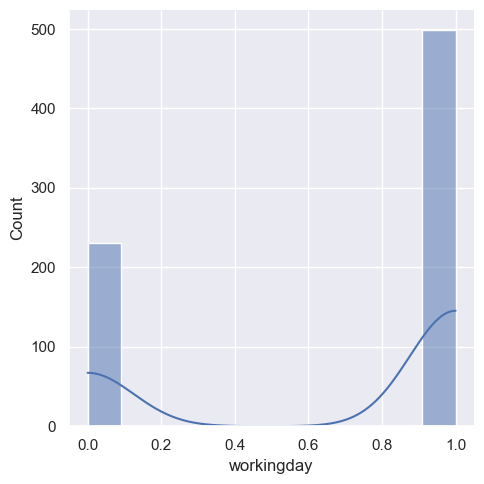

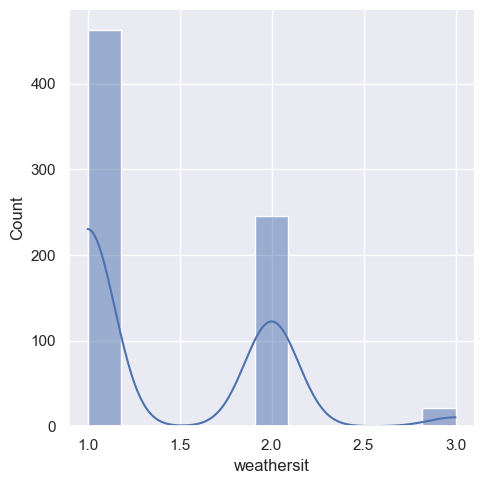

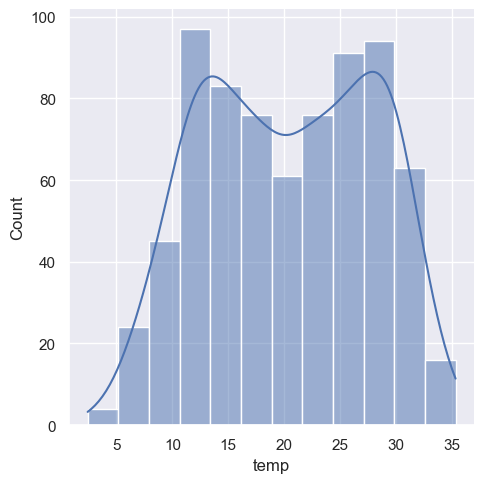

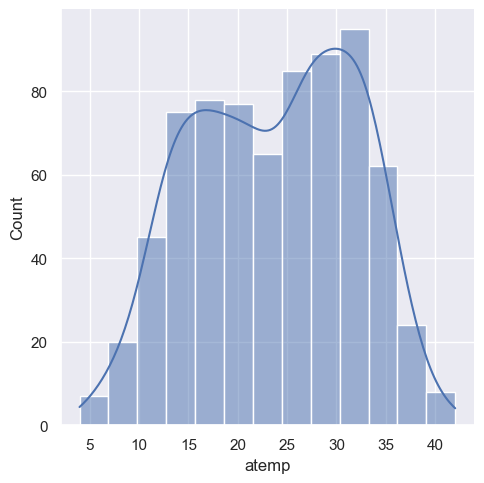

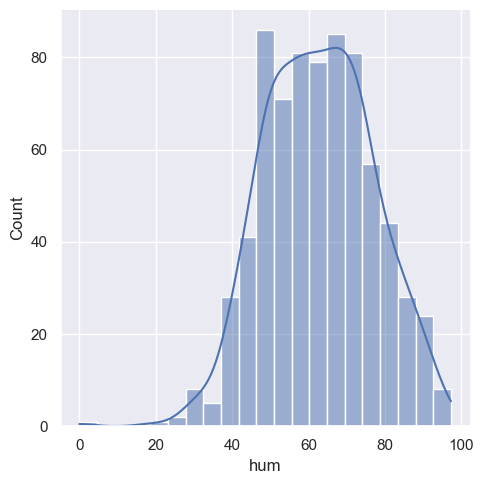

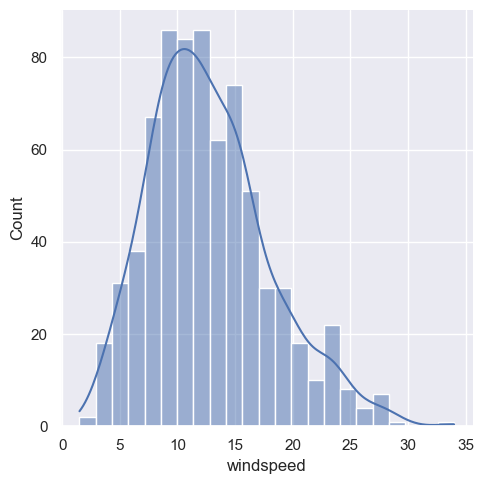

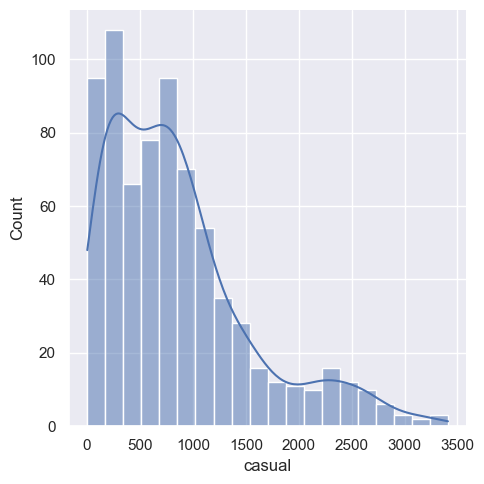

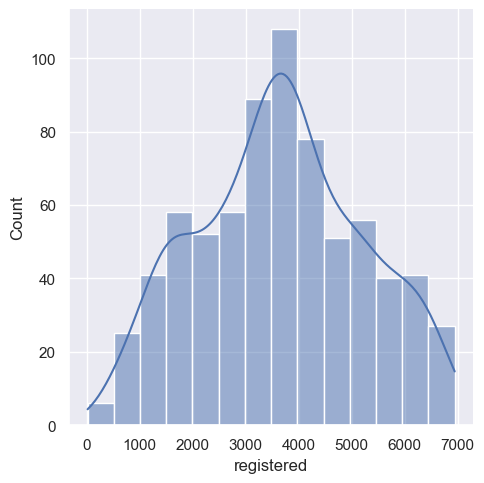

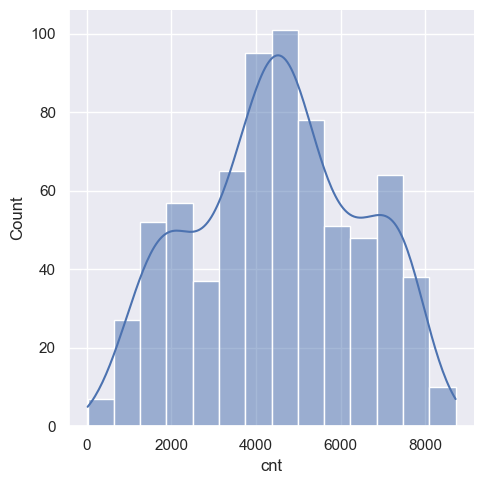

In [16]:
# let us plot all the columns to look at their distributions
# this will provide insights for various columns

for i in bike.columns[:]:
    if bike[i].dtype != 'object':
        sns.set({'figure.figsize': (10,10)})
        sns.displot(bike[i], kde=True)
        plt.show()

**Observations**
- The 'workingday' feature shows more count for working day
- The 'weathersit' feature plays a big role on the count
- The other features do not provide much insignts but it could have an impact on multicollinearity

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Bivariate Analysis

### Identify Correlation in data for all columns

In [17]:
# understand the correlation between various variable (X)
df_corr = bike.corr()
df_corr

instant  season      yr    mnth  holiday  weekday  workingday  \
instant      1.0000  0.4136  0.8660  0.4983   0.0163  -0.0000     -0.0046   
season       0.4136  1.0000 -0.0000  0.8310  -0.0109  -0.0031      0.0138   
yr           0.8660 -0.0000  1.0000 -0.0000   0.0082  -0.0055     -0.0029   
mnth         0.4983  0.8310 -0.0000  1.0000   0.0189   0.0095     -0.0047   
holiday      0.0163 -0.0109  0.0082  0.0189   1.0000  -0.1020     -0.2529   
weekday     -0.0000 -0.0031 -0.0055  0.0095  -0.1020   1.0000      0.0358   
workingday  -0.0046  0.0138 -0.0029 -0.0047  -0.2529   0.0358      1.0000   
weathersit  -0.0219  0.0213 -0.0503  0.0456  -0.0344   0.0311      0.0602   
temp         0.1507  0.3334  0.0488  0.2191  -0.0288  -0.0002      0.0535   
atemp        0.1528  0.3420  0.0472  0.2264  -0.0327  -0.0075      0.0529   
hum          0.0161  0.2082 -0.1125  0.2249  -0.0157  -0.0523      0.0232   
windspeed   -0.1127 -0.2296 -0.0116 -0.2080   0.0063   0.0143     -0.0187   
casual       0.2756  0.2087  0.2505  0.1212   0.0541   0.0600     -0.5176   
registered   0.6605  0.4103  0.5969  0.2920  -0.1091   0.0574      0.3054   
cnt          0.6299  0.4046  0.5697  0.2782  -0.0688   0.0675      0.0625   

            weathersit    temp   atemp     hum  windspeed  casual  registered  \
instant        -0.0219  0.1507  0.1528  0.0161    -0.1127  0.2756      0.6605   
season          0.0213  0.3334  0.3420  0.2082    -0.2296  0.2087      0.4103   
yr             -0.0503  0.0488  0.0472 -0.1125    -0.0116  0.2505      0.5969   
mnth            0.0456  0.2191  0.2264  0.2249    -0.2080  0.1212      0.2920   
holiday        -0.0344 -0.0288 -0.0327 -0.0157     0.0063  0.0541     -0.1091   
weekday         0.0311 -0.0002 -0.0075 -0.0523     0.0143  0.0600      0.0574   
workingday      0.0602  0.0535  0.0529  0.0232    -0.0187 -0.5176      0.3054   
weathersit      1.0000 -0.1195 -0.1206  0.5903     0.0398 -0.2460     -0.2590   
temp           -0.1195  1.0000  0.9917  0.1286    -0.1582  0.5427      0.5394   
atemp          -0.1206  0.9917  1.0000  0.1415    -0.1839  0.5434      0.5437   
hum             0.5903  0.1286  0.1415  1.0000    -0.2485 -0.0752     -0.0892   
windspeed       0.0398 -0.1582 -0.1839 -0.2485     1.0000 -0.1680     -0.2179   
casual         -0.2460  0.5427  0.5434 -0.0752    -0.1680  1.0000      0.3941   
registered     -0.2590  0.5394  0.5437 -0.0892    -0.2179  0.3941      1.0000   
cnt            -0.2959  0.6270  0.6307 -0.0985    -0.2351  0.6721      0.9454   

               cnt  
instant     0.6299  
season      0.4046  
yr          0.5697  
mnth        0.2782  
holiday    -0.0688  
weekday     0.0675  
workingday  0.0625  
weathersit -0.2959  
temp        0.6270  
atemp       0.6307  
hum        -0.0985  
windspeed  -0.2351  
casual      0.6721  
registered  0.9454  
cnt         1.0000

In [18]:
all_col

['mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

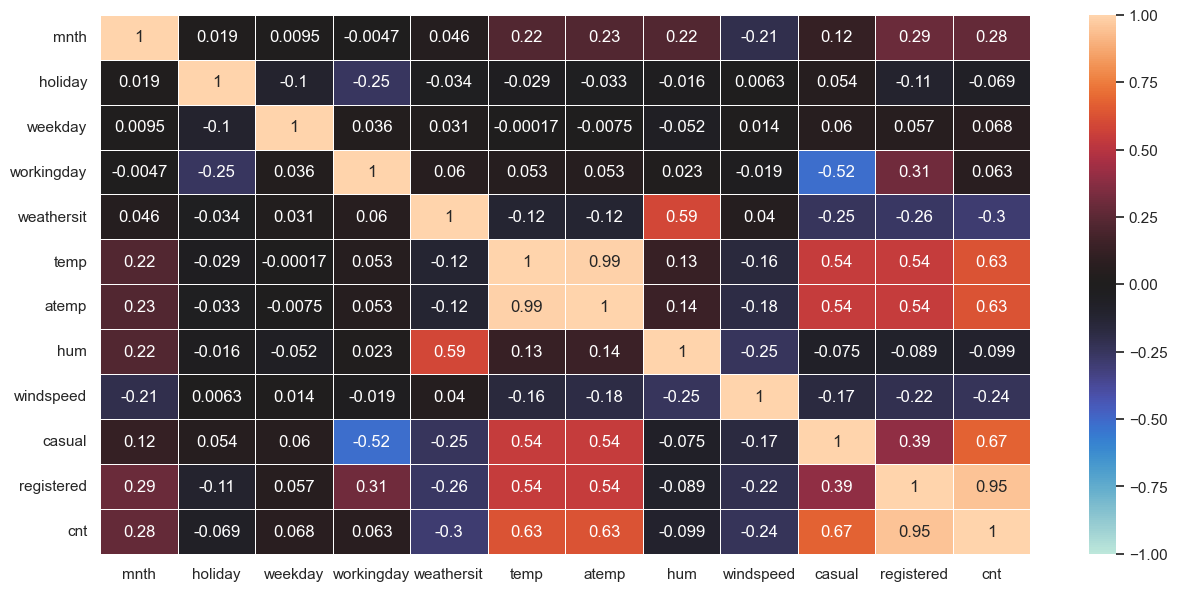

In [19]:
plt.figure(figsize=(15,7))

sns.heatmap(bike[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

### Build pairplots

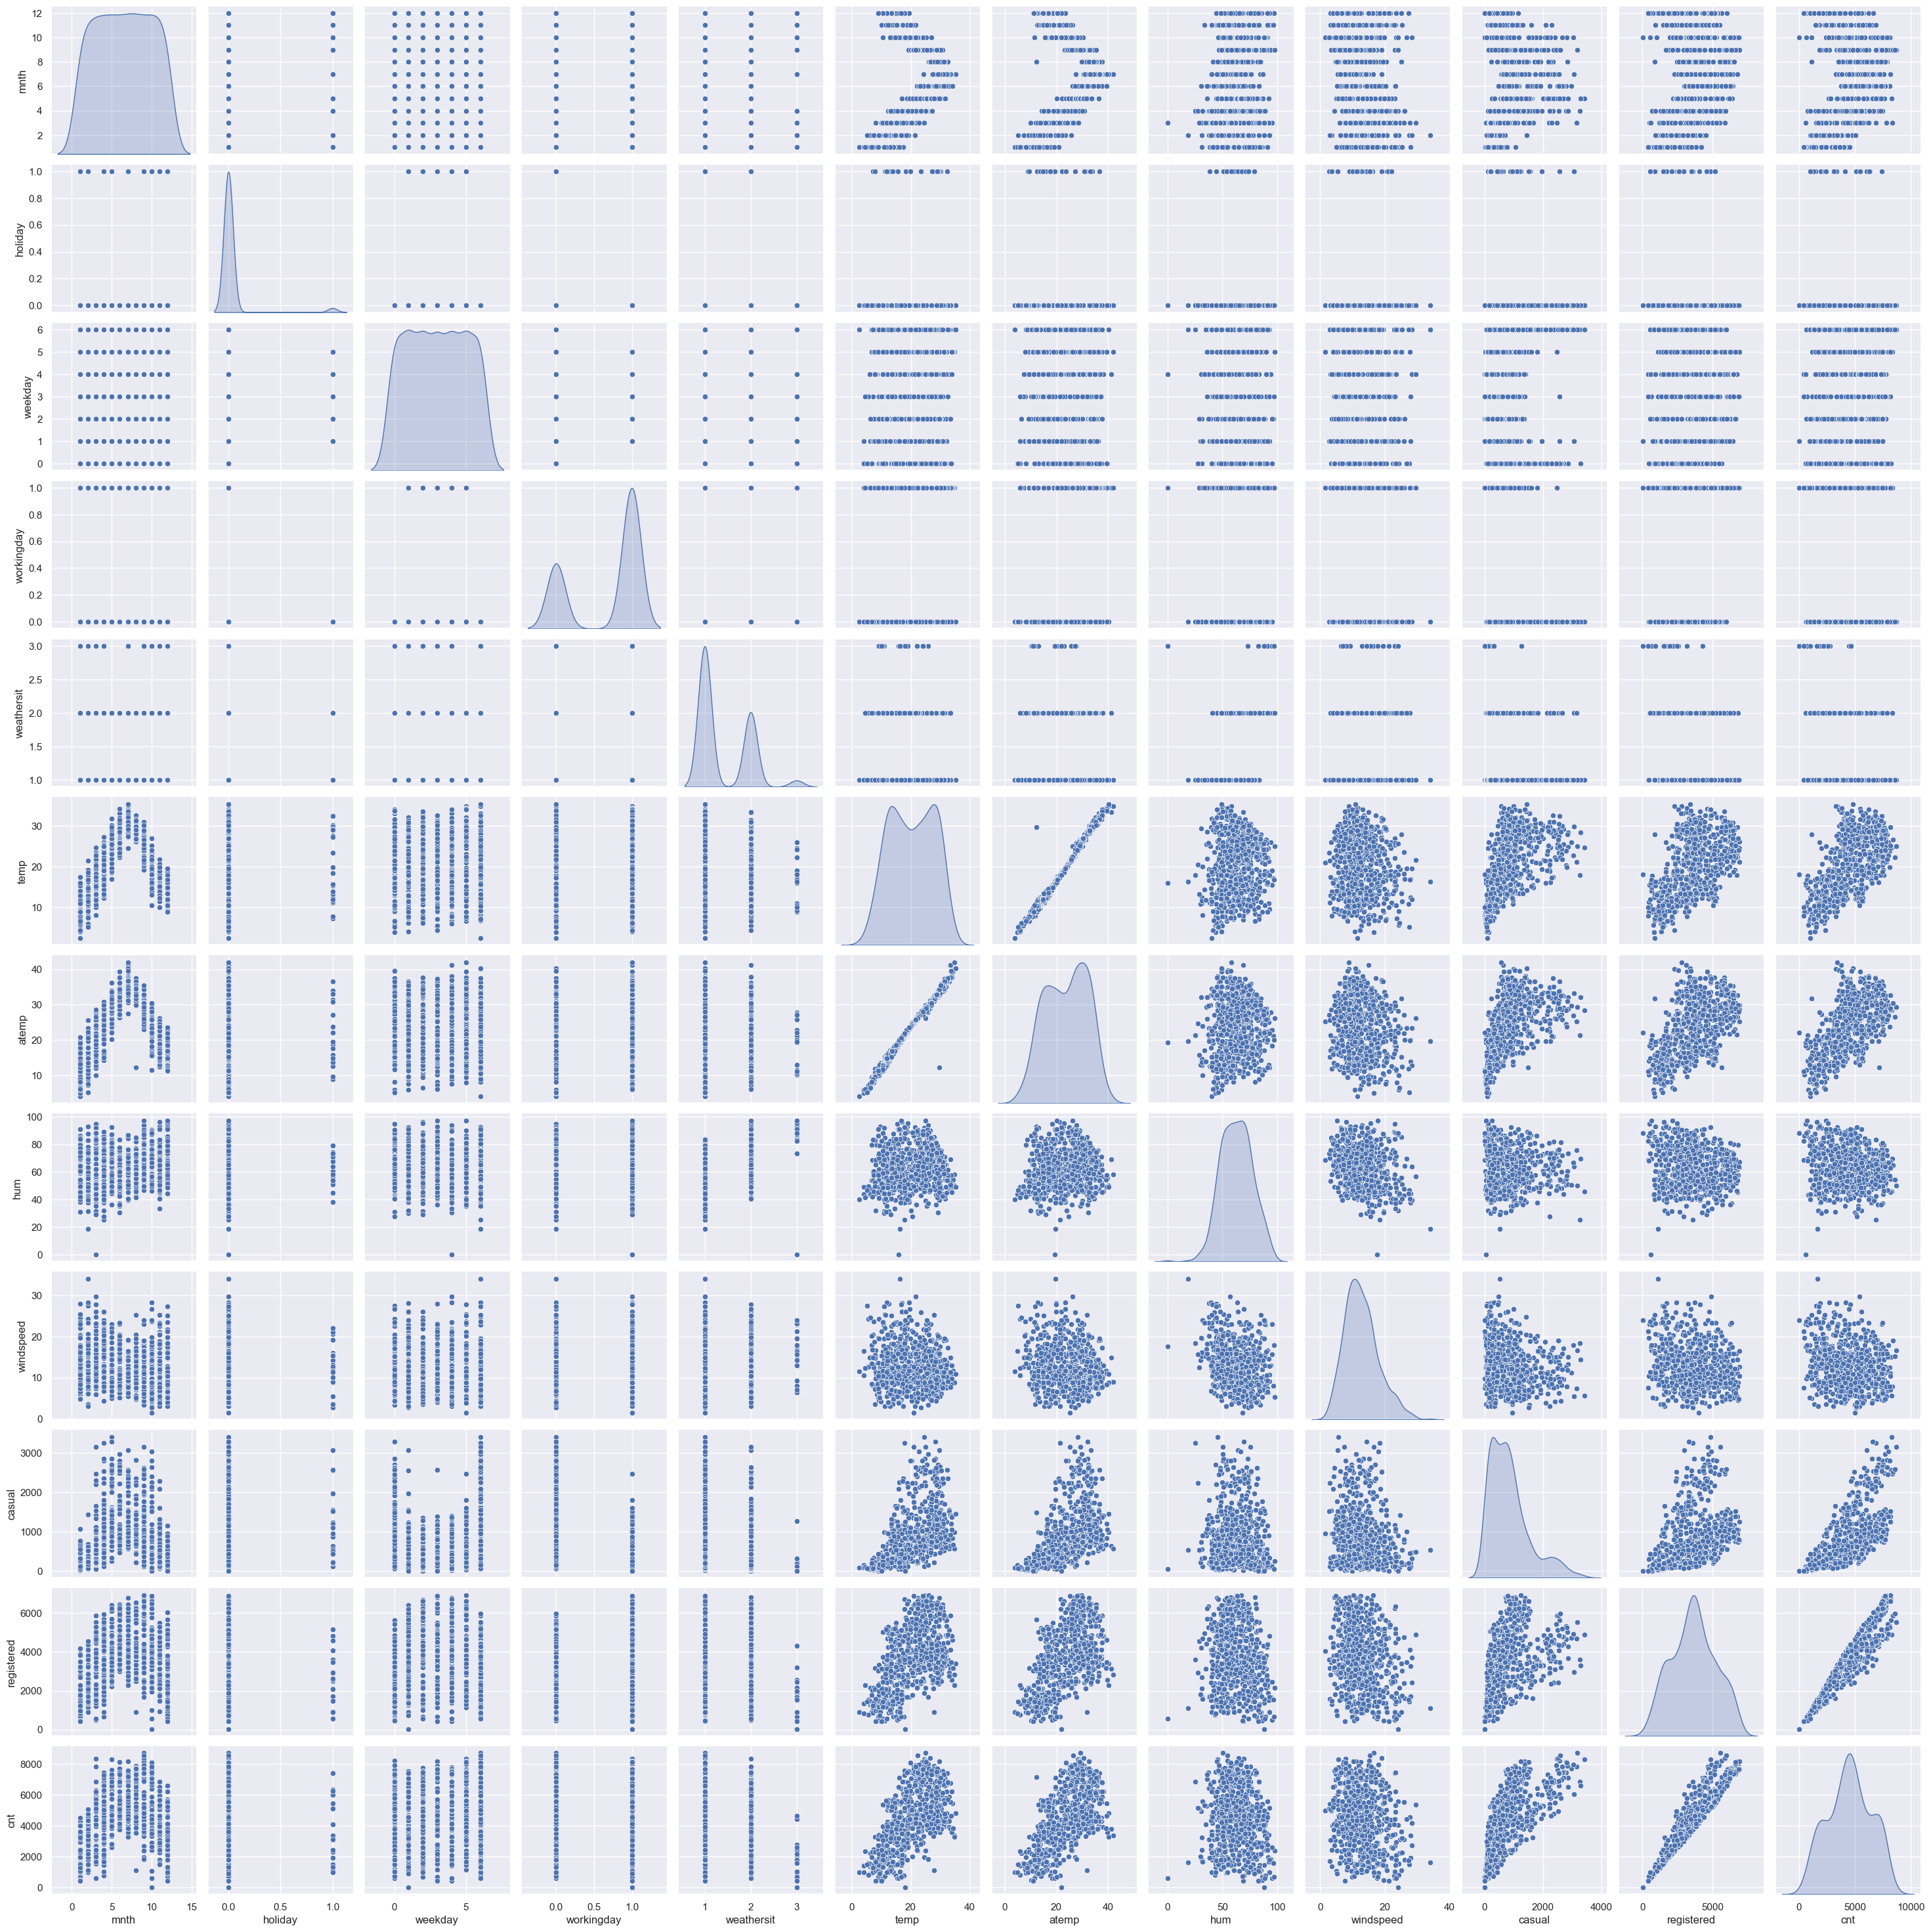

In [20]:
sns.pairplot(bike[all_col],diag_kind="kde")
plt.show()

**Observations**
- Many of features appear to have multiple gaussian.
- The temperature and feeling temperature has a high correlation to the total number of bikes rented
- Windspeed has a negative correlation, which makes sense as it would require greater force to bike
- The temperature and feeling temperature has high correlation between themselves (multicollinearity). This is quite normal
- There is also correlation between hundity and weather situation
- Other features also have correlation but it is limited 

<AxesSubplot: xlabel='dteday'>

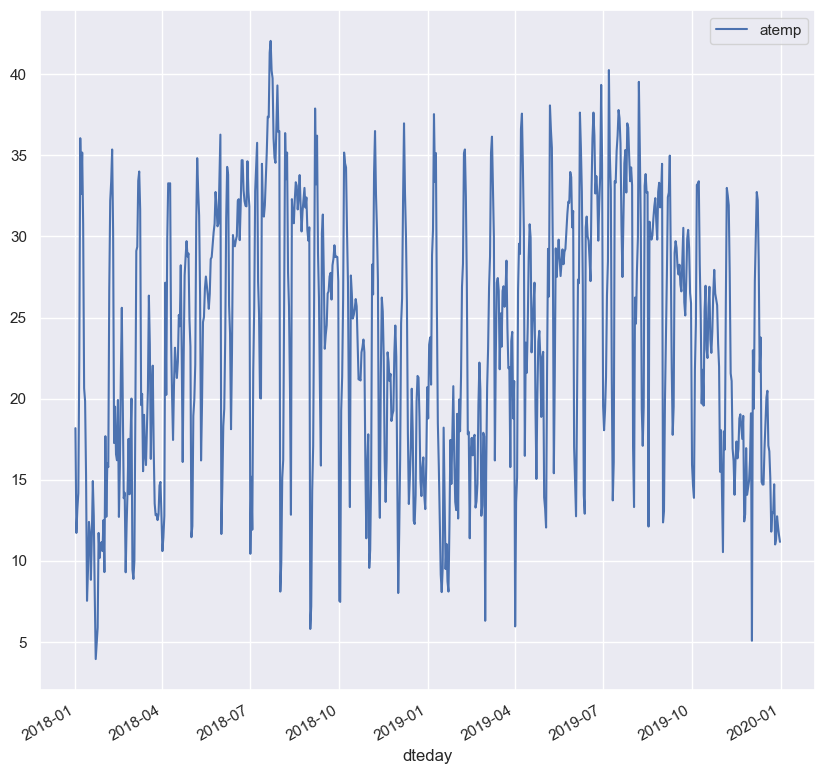

In [21]:
# temp vs atemp
bike.plot.line(x='dteday', y='atemp')

### Feature Engineering and Data processing steps

- Managing the categorical values and using dummy variable concept from pandas

#### Dummy Variables

In [22]:
# Defining the columns which are category and require dummy variables
bike_vars_cat = ["season","mnth","weekday","weathersit"]

In [23]:
# View the first ten entries of the data
bike.head(10)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-02-01       1   0     1        0        0           0   
2        3 2018-03-01       1   0     1        0        1           1   
3        4 2018-04-01       1   0     1        0        2           1   
4        5 2018-05-01       1   0     1        0        3           1   
5        6 2018-06-01       1   0     1        0        4           1   
6        7 2018-07-01       1   0     1        0        5           1   
7        8 2018-08-01       1   0     1        0        6           0   
8        9 2018-09-01       1   0     1        0        0           0   
9       10 2018-10-01       1   0     1        0        1           1   

   weathersit    temp   atemp     hum  windspeed  casual  registered   cnt  
0           2 14.1108 18.1812 80.5833    10.7499     331         654   985  
1           2 14.9026 17.6869 69.6087    16.6521     131         670   801  
2           1  8.0509  9.4703 43.7273    16.6367     120        1229  1349  
3           1  8.2000 10.6061 59.0435    10.7398     108        1454  1562  
4           1  9.3052 11.4635 43.6957    12.5223      82        1518  1600  
5           1  8.3783 11.6605 51.8261     6.0009      88        1518  1606  
6           2  8.0574 10.4420 49.8696    11.3046     148        1362  1510  
7           2  6.7650  8.1127 53.5833    17.8759      68         891   959  
8           1  5.6717  5.8087 43.4167    24.2507      54         768   822  
9           1  6.1842  7.5444 48.2917    14.9589      41        1280  1321

In [24]:
# get the infor regrading the dataset to check for information regarding the data
print('*******************Dataset Info*************************')
bike.info()

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 n

In [25]:
# print the shape of the uploaded data
print('*******************DataSet Shape************************')
bike.shape

*******************DataSet Shape************************


(730, 16)

In [26]:
bike_encoded=pd.get_dummies(bike,columns=bike_vars_cat, drop_first=True)

In [27]:
# print the shape of the uploaded data
print('*******************DataSet Shape************************')
bike_encoded.shape

*******************DataSet Shape************************


(730, 34)

In [28]:
bike_encoded.head(10)

instant     dteday  yr  holiday  workingday    temp   atemp     hum  \
0        1 2018-01-01   0        0           0 14.1108 18.1812 80.5833   
1        2 2018-02-01   0        0           0 14.9026 17.6869 69.6087   
2        3 2018-03-01   0        0           1  8.0509  9.4703 43.7273   
3        4 2018-04-01   0        0           1  8.2000 10.6061 59.0435   
4        5 2018-05-01   0        0           1  9.3052 11.4635 43.6957   
5        6 2018-06-01   0        0           1  8.3783 11.6605 51.8261   
6        7 2018-07-01   0        0           1  8.0574 10.4420 49.8696   
7        8 2018-08-01   0        0           0  6.7650  8.1127 53.5833   
8        9 2018-09-01   0        0           0  5.6717  5.8087 43.4167   
9       10 2018-10-01   0        0           1  6.1842  7.5444 48.2917   

   windspeed  casual  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0    10.7499     331  ...        0        0          0          0          0   
1    16.6521     131  ...        0        0          0          0          0   
2    16.6367     120  ...        0        0          1          0          0   
3    10.7398     108  ...        0        0          0          1          0   
4    12.5223      82  ...        0        0          0          0          1   
5     6.0009      88  ...        0        0          0          0          0   
6    11.3046     148  ...        0        0          0          0          0   
7    17.8759      68  ...        0        0          0          0          0   
8    24.2507      54  ...        0        0          0          0          0   
9    14.9589      41  ...        0        0          1          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          1             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          0          0          0             0             0  
4          0          0          0             0             0  
5          1          0          0             0             0  
6          0          1          0             1             0  
7          0          0          1             1             0  
8          0          0          0             0             0  
9          0          0          0             0             0  

[10 rows x 34 columns]

In [29]:
bike_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       730 non-null    int64         
 1   dteday        730 non-null    datetime64[ns]
 2   yr            730 non-null    int64         
 3   holiday       730 non-null    int64         
 4   workingday    730 non-null    int64         
 5   temp          730 non-null    float64       
 6   atemp         730 non-null    float64       
 7   hum           730 non-null    float64       
 8   windspeed     730 non-null    float64       
 9   casual        730 non-null    int64         
 10  registered    730 non-null    int64         
 11  cnt           730 non-null    int64         
 12  season_2      730 non-null    uint8         
 13  season_3      730 non-null    uint8         
 14  season_4      730 non-null    uint8         
 15  mnth_2        730 non-null    uint8     

**Dropping columns**
 - As we can see from the data visualization that the cnt, casual and registered columns are highly correlated and temp and atemp are also highly correcated. 
 - Hence we can drop atemp, casual and registered in the furter analysis and Model building
 - We can also drop the column instant as the datframe already has an index.
 - The same can be done dteday also. The dataset already has months and day of the week

In [30]:
bike_encoded.describe()

instant       yr  holiday  workingday     temp    atemp      hum  \
count 730.0000 730.0000 730.0000    730.0000 730.0000 730.0000 730.0000   
mean  365.5000   0.5000   0.0288      0.6836  20.3193  23.7263  62.7652   
std   210.8771   0.5003   0.1673      0.4654   7.5067   8.1503  14.2376   
min     1.0000   0.0000   0.0000      0.0000   2.4243   3.9535   0.0000   
25%   183.2500   0.0000   0.0000      0.0000  13.8119  16.8897  52.0000   
50%   365.5000   0.5000   0.0000      1.0000  20.4658  24.3682  62.6250   
75%   547.7500   1.0000   0.0000      1.0000  26.8806  30.4458  72.9896   
max   730.0000   1.0000   1.0000      1.0000  35.3283  42.0448  97.2500   

       windspeed     casual  registered  ...  mnth_11  mnth_12  weekday_1  \
count   730.0000   730.0000    730.0000  ... 730.0000 730.0000   730.0000   
mean     12.7636   849.2493  3,658.7575  ...   0.0822   0.0849     0.1438   
std       5.1958   686.4799  1,559.7587  ...   0.2748   0.2790     0.3512   
min       1.5002     2.0000     20.0000  ...   0.0000   0.0000     0.0000   
25%       9.0417   316.2500  2,502.2500  ...   0.0000   0.0000     0.0000   
50%      12.1253   717.0000  3,664.5000  ...   0.0000   0.0000     0.0000   
75%      15.6256 1,096.5000  4,783.2500  ...   0.0000   0.0000     0.0000   
max      34.0000 3,410.0000  6,946.0000  ...   1.0000   1.0000     1.0000   

       weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
count   730.0000   730.0000   730.0000   730.0000   730.0000      730.0000   
mean      0.1425     0.1411     0.1425     0.1425     0.1438        0.3370   
std       0.3498     0.3484     0.3498     0.3498     0.3512        0.4730   
min       0.0000     0.0000     0.0000     0.0000     0.0000        0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000        0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000        0.0000   
75%       0.0000     0.0000     0.0000     0.0000     0.0000        1.0000   
max       1.0000     1.0000     1.0000     1.0000     1.0000        1.0000   

       weathersit_3  
count      730.0000  
mean         0.0288  
std          0.1673  
min          0.0000  
25%          0.0000  
50%          0.0000  
75%          0.0000  
max          1.0000  

[8 rows x 33 columns]

In [31]:
bike_encoded

instant     dteday  yr  holiday  workingday    temp   atemp     hum  \
0          1 2018-01-01   0        0           0 14.1108 18.1812 80.5833   
1          2 2018-02-01   0        0           0 14.9026 17.6869 69.6087   
2          3 2018-03-01   0        0           1  8.0509  9.4703 43.7273   
3          4 2018-04-01   0        0           1  8.2000 10.6061 59.0435   
4          5 2018-05-01   0        0           1  9.3052 11.4635 43.6957   
..       ...        ...  ..      ...         ...     ...     ...     ...   
725      726 2019-12-27   1        0           1 10.4208 11.3321 65.2917   
726      727 2019-12-28   1        0           1 10.3867 12.7523 59.0000   
727      728 2019-12-29   1        0           0 10.3867 12.1200 75.2917   
728      729 2019-12-30   1        0           0 10.4892 11.5850 48.3333   
729      730 2019-12-31   1        0           1  8.8492 11.1744 57.7500   

     windspeed  casual  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
0      10.7499     331  ...        0        0          0          0   
1      16.6521     131  ...        0        0          0          0   
2      16.6367     120  ...        0        0          1          0   
3      10.7398     108  ...        0        0          0          1   
4      12.5223      82  ...        0        0          0          0   
..         ...     ...  ...      ...      ...        ...        ...   
725    23.4589     247  ...        0        1          0          0   
726    10.4166     644  ...        0        1          0          0   
727     8.3337     159  ...        0        1          0          0   
728    23.5005     364  ...        0        1          0          0   
729    10.3747     439  ...        0        1          1          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0            0          0          0          1             1             0  
1            0          0          0          0             1             0  
2            0          0          0          0             0             0  
3            0          0          0          0             0             0  
4            1          0          0          0             0             0  
..         ...        ...        ...        ...           ...           ...  
725          0          1          0          0             1             0  
726          0          0          1          0             1             0  
727          0          0          0          1             1             0  
728          0          0          0          0             0             0  
729          0          0          0          0             1             0  

[730 rows x 34 columns]

In [32]:
# Dropping the columns which are not required
bike_encoded_red = bike_encoded.copy()

bike_encoded_red.drop(['dteday','instant','atemp', 'casual', 'registered'], axis=1, inplace=True)

In [33]:
bike_encoded_red.head()

yr  holiday  workingday    temp     hum  windspeed   cnt  season_2  \
0   0        0           0 14.1108 80.5833    10.7499   985         0   
1   0        0           0 14.9026 69.6087    16.6521   801         0   
2   0        0           1  8.0509 43.7273    16.6367  1349         0   
3   0        0           1  8.2000 59.0435    10.7398  1562         0   
4   0        0           1  9.3052 43.6957    12.5223  1600         0   

   season_3  season_4  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          0          0          0   
1         0         0  ...        0        0          0          0          0   
2         0         0  ...        0        0          1          0          0   
3         0         0  ...        0        0          0          1          0   
4         0         0  ...        0        0          0          0          1   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          1             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          0          0          0             0             0  
4          0          0          0             0             0  

[5 rows x 29 columns]

## Model Building 

### Splitting the Data into Training and Testing Sets
- Performing the steps to randomly put 70% data in train and 30% in test

In [34]:
# Using the sklearn train_test_split to perform the split
# Value is provided to random_state so that random values and seed are same 
np.random.seed(0)
df_train, df_test = train_test_split(bike_encoded_red, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
df_train

yr  holiday  workingday    temp     hum  windspeed   cnt  season_2  \
653   1        0           1 19.2017 55.8333    12.2088  7534         0   
576   1        0           1 29.2467 70.4167    11.0835  7216         0   
426   1        0           0 16.9808 62.1250    10.7923  4066         0   
728   1        0           0 10.4892 48.3333    23.5005  1796         0   
482   1        0           0 15.4433 48.9583     8.7083  4220         1   
..   ..      ...         ...     ...     ...        ...   ...       ...   
526   1        0           1 29.5542 58.7917    13.9168  6664         1   
578   1        0           1 30.8525 65.9583     8.6667  7261         0   
53    0        0           1  9.0913 42.3043     6.3056  1917         0   
350   0        0           0 10.5917 56.0833    16.2922  2739         0   
79    0        0           1 17.6478 73.7391    19.3485  2077         1   

     season_3  season_4  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
653         0         1  ...        0        0          0          1   
576         1         0  ...        0        0          0          1   
426         0         0  ...        0        0          0          0   
728         0         0  ...        0        1          0          0   
482         0         0  ...        0        0          0          0   
..        ...       ...  ...      ...      ...        ...        ...   
526         0         0  ...        0        0          1          0   
578         1         0  ...        0        0          0          0   
53          0         0  ...        0        0          0          0   
350         0         1  ...        0        1          0          0   
79          0         0  ...        0        0          1          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
653          0          0          0          0             0             0  
576          0          0          0          0             0             0  
426          0          0          0          1             1             0  
728          0          0          0          0             0             0  
482          0          0          0          1             1             0  
..         ...        ...        ...        ...           ...           ...  
526          0          0          0          0             1             0  
578          0          1          0          0             0             0  
53           1          0          0          0             0             0  
350          0          0          0          1             1             0  
79           0          0          0          0             1             0  

[510 rows x 29 columns]

In [36]:
bike_encoded_red.shape

(730, 29)

In [37]:
df_train.shape

(510, 29)

In [38]:
df_test.shape

(219, 29)

#### Rescaling the Features 

- Scaling the features to improve the model building process
- Now we have done the train test split. We can now perform scaling on the train data seperately
- For the test data we will perform at the time when we use the predict process

In [39]:
# Intialize the model
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
bike_var_num = ['temp', 'hum', 'windspeed','cnt']

df_train[bike_var_num] = scaler.fit_transform(df_train[bike_var_num])

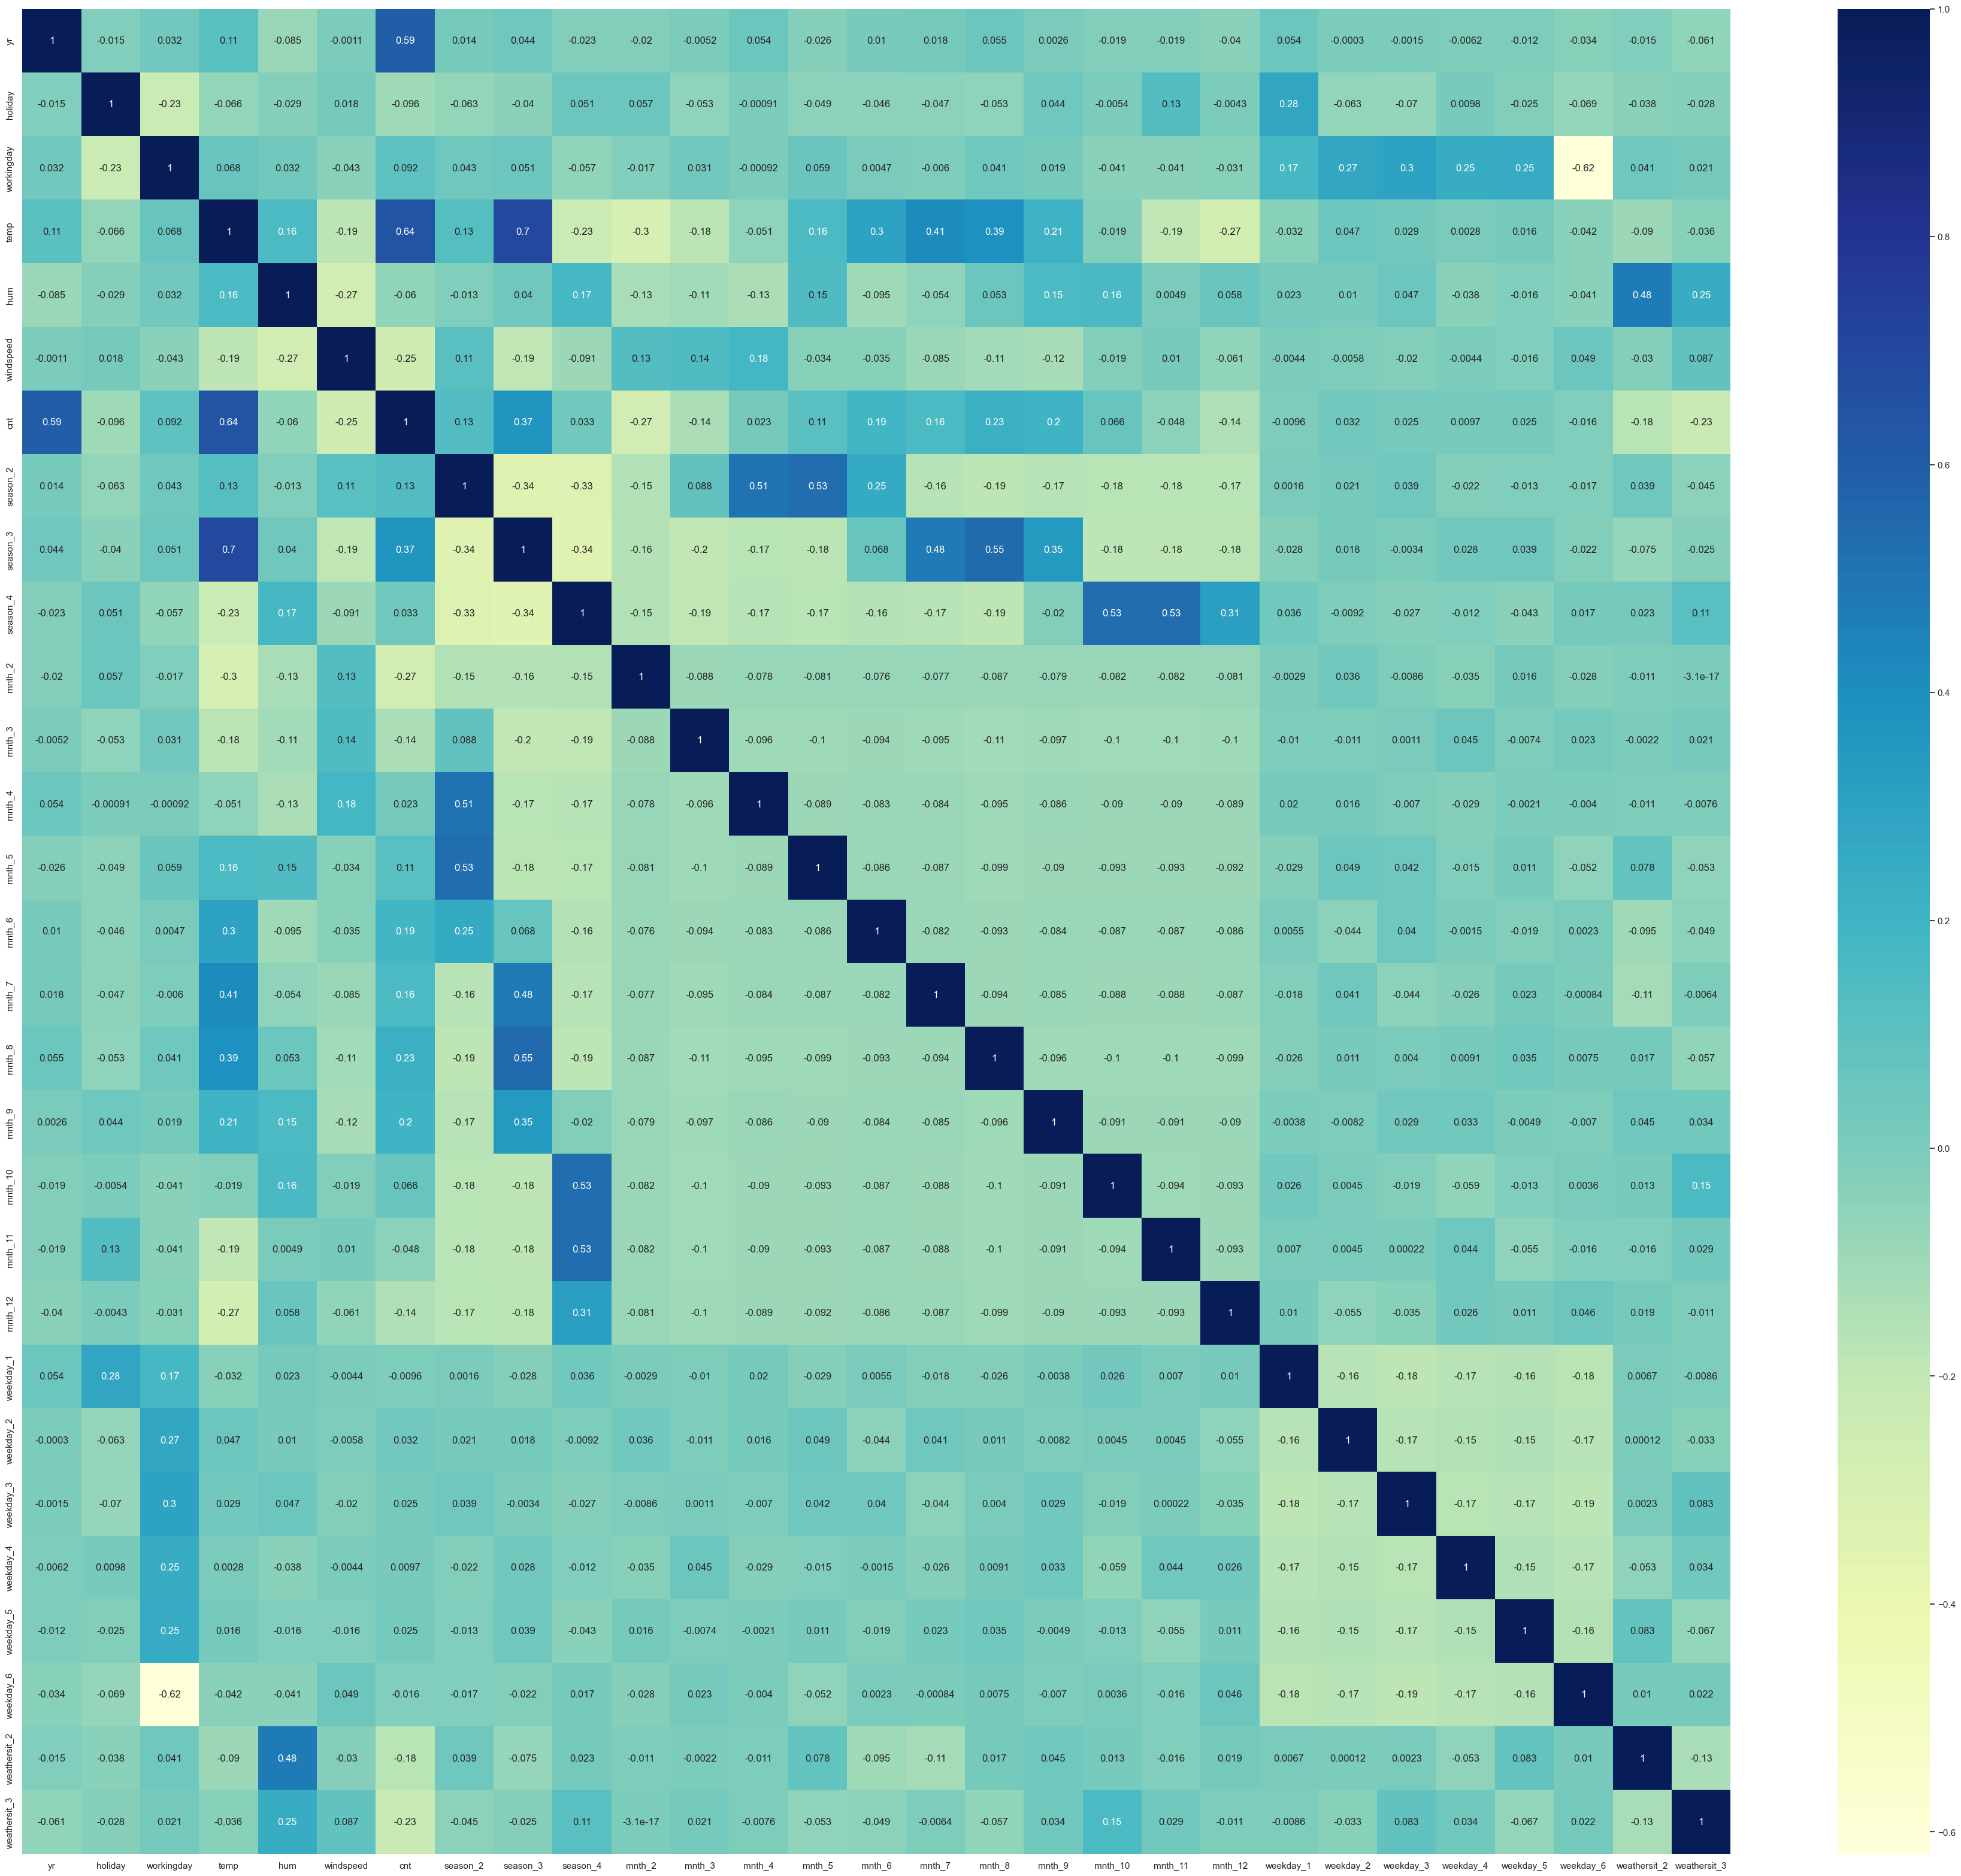

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (46, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- We can see there is some corelations in weather and time of the year
- For example, humidity is related to the rain period

### Seperating the data into X and Y sets for the model building

In [41]:
# Train data
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train.head()

yr  holiday  workingday   temp    hum  windspeed  season_2  season_3  \
653   1        0           1 0.5099 0.5754     0.3008         0         0   
576   1        0           1 0.8152 0.7256     0.2647         0         1   
426   1        0           0 0.4424 0.6402     0.2553         0         0   
728   1        0           0 0.2451 0.4981     0.6631         0         0   
482   1        0           0 0.3957 0.5045     0.1885         1         0   

     season_4  mnth_2  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
653         1       0  ...        0        0          0          1          0   
576         0       0  ...        0        0          0          1          0   
426         0       0  ...        0        0          0          0          0   
728         0       0  ...        0        1          0          0          0   
482         0       0  ...        0        0          0          0          0   

     weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
653          0          0          0             0             0  
576          0          0          0             0             0  
426          0          0          1             1             0  
728          0          0          0             0             0  
482          0          0          1             1             0  

[5 rows x 28 columns]

### Building a linear model

Building a model using `statsmodels` to define a regression line for the training data. The statsmodels provide a summary which can be used to better understand which features to keep or remove. This will help in refinig the model

#### The model tunning will be done based on the following parameters for features
- Look at stastical significance of variables
- VFI 

In [43]:
# Check all the columns of the dataframe

X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [44]:
#Build a linear model

#Define the contsant in the dataset
X_train_lm = sm.add_constant(X_train)

# Intialize the model
lr_model = sm.OLS

#Fit the model
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

#Parameters of the model
lr_1.params

const           0.1760
yr              0.2321
holiday        -0.0430
workingday      0.0440
temp            0.4506
hum            -0.1513
windspeed      -0.1865
season_2        0.0869
season_3        0.0482
season_4        0.1540
mnth_2          0.0305
mnth_3          0.0638
mnth_4          0.0628
mnth_5          0.0867
mnth_6          0.0598
mnth_7          0.0224
mnth_8          0.0772
mnth_9          0.1438
mnth_10         0.0703
mnth_11         0.0209
mnth_12         0.0172
weekday_1      -0.0098
weekday_2      -0.0078
weekday_3       0.0057
weekday_4       0.0018
weekday_5       0.0111
weekday_6       0.0545
weathersit_2   -0.0611
weathersit_3   -0.2574
dtype: float64

In [45]:
# print the shape of the uploaded data
print('*******************Model Summary************************')

print(lr_1.summary())

*******************Model Summary************************
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        10:53:02   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**Observations**
- The model has a very high R-Squared value of approx 85.3% and Adjusted R-Squared value of approx 84.5%. The values in text at decimal place could be different than what is in summary as the text in this cell is static
- The probability if F-statistic is almost zero
- There are various features where the p-values is above 0.05
- This is quite understandable as the parameters are linked to each other. For example, the days in the week are highly correlated between themselves. Same is for the months column

***One approach would be to not do dummy variables for days of week and month. Since there is a strong interaction, the model will be able to bring a meaning by understanding that the Friday in month of December has low rental. This can be used by the company to look an ways to improve rental for that specific time period***

### Checking Variance Inflation Factor (VIF)

Variance Inflation Factor gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
23     weekday_4     inf
24     weekday_5     inf
2     workingday     inf
22     weekday_3     inf
21     weekday_2     inf
20     weekday_1     inf
1        holiday     inf
3           temp 47.0600
4            hum 20.6500
7       season_3 15.4000
8       season_4 10.9300
15        mnth_8 10.9100
14        mnth_7  9.6000
6       season_2  8.8800
16        mnth_9  7.3300
13        mnth_6  7.3100
12        mnth_5  7.1500
17       mnth_10  6.6400
18       mnth_11  5.9900
11        mnth_4  5.6400
5      windspeed  4.4700
19       mnth_12  3.7800
10        mnth_3  3.0600
26  weathersit_2  2.2100
0             yr  2.0900
25     weekday_6  1.9300
9         mnth_2  1.7100
27  weathersit_3  1.2200

**Observations**
- Many columns have VIF of infinite value as most of the columns are derived from dummy variables
- For example, months in year columns are high correlated
- As seen from the Data visualization, the weekdays had a simialr correlation to the dependent variables

***We could drop some of the columns to refine the model, but one interesting approach would be to not do dummy variables for days of week and month. Since there is a strong interaction, the model will be able to bring a meaning by understanding that the Friday in month of December has low rental. This can also be done by dummy variables concept but having a single column could be interesting study. This can be used by the company to look an ways to improve rental for that specific time period***

#### Another option would be to look at an RFE model

- The number of columns in the model are quite high and trying to remove or add columns one-by-one can be very time consuming
- The approach of the RFE would be followed now

### RFE Model Base

- We will begin with 19 columns if we take a VIF cutoff of value 11. 
- This is just ann arbitary number but using the VIF data can provide some guidance

In [47]:
# Intializing the RFE model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 19
rfe = RFE(lm, n_features_to_select=19,step=1)

# Fit with 19 features
rfe = rfe.fit(X_train, y_train)

In [48]:
# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True  True  True  True  True  True False  True False False False
 False False False  True  True  True False False  True  True  True  True
  True  True  True  True]
[ 1  1  1  1  1  1  1  2  1  7  3  5  4  6  9  1  1  1  8 10  1  1  1  1
  1  1  1  1]


In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 10),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

**Observations**

- As we can see that the from the RFE model that the month column has ranking order from 3 onwards
- One model could be made by either not defining dummy variable for the month
- Another approach could be to decrease the number of features

#### Building model using statsmodel, for the detailed statistics

- Evaluate the model to see how it performed

In [50]:
# columns proposed by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [51]:
# columns diregarded by the RFE
X_train.columns[~rfe.support_]

Index(['season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12'],
      dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

const  yr  holiday  workingday   temp    hum  windspeed  season_2  \
653 1.0000   1        0           1 0.5099 0.5754     0.3008         0   
576 1.0000   1        0           1 0.8152 0.7256     0.2647         0   
426 1.0000   1        0           0 0.4424 0.6402     0.2553         0   
728 1.0000   1        0           0 0.2451 0.4981     0.6631         0   
482 1.0000   1        0           0 0.3957 0.5045     0.1885         1   

     season_4  mnth_8  mnth_9  mnth_10  weekday_1  weekday_2  weekday_3  \
653         1       0       0        1          0          1          0   
576         0       0       0        0          0          1          0   
426         0       0       0        0          0          0          0   
728         0       0       0        0          0          0          0   
482         0       0       0        0          0          0          0   

     weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
653          0          0          0             0             0  
576          0          0          0             0             0  
426          0          0          1             1             0  
728          0          0          0             0             0  
482          0          0          1             1             0

In [54]:
# Fitting the model with 19 variables
lm0 = sm.OLS(y_train, X_train_rfe).fit()

In [55]:
#Let's see the summary of our linear model
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.3
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.01e-188
Time:                        10:53:02   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1922      0.029      6.665   

**Observations**

- The model has a very high R-Squared value of approx 84.9% and Adjusted R-Squared value of approx 84.3%. 
- These values are quite close to the earlier model where all columns were part of the model. There is only a slight reduction in value compared to previous model
- The values has changed slightly from **85.3% to 84.9%**.
- Look at the VIF and use it remove further columns

In [56]:
# Removing the constant from the RFE dataset
df_rfe = X_train_rfe.drop('const',axis=1)

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_rfe.columns
vif['VIF'] = [variance_inflation_factor(df_rfe.values, i) for i in range(df_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
13     weekday_3     inf
2     workingday     inf
15     weekday_5     inf
1        holiday     inf
14     weekday_4     inf
11     weekday_1     inf
12     weekday_2     inf
4            hum 16.6200
3           temp 10.0300
5      windspeed  3.8300
7       season_4  2.2700
17  weathersit_2  2.1500
0             yr  2.0300
16     weekday_6  1.9000
6       season_2  1.8300
10       mnth_10  1.6200
8         mnth_8  1.6000
9         mnth_9  1.3400
18  weathersit_3  1.1900

### Building an updated RFE Model 1 based on analysis 

- The RFE model defined as rfe1
- We will begin with 11 columns if we take a VIF cutoff of value 10.5. 
- This is just ann arbitary number but using the VIF data can provide some guidance

In [58]:
# Intializing the RFE model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 11
rfe1 = RFE(lm, n_features_to_select=11,step=1)

# Fit with 11 features
rfe1 = rfe1.fit(X_train, y_train)

In [59]:
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True  True  True  True
  True False False False]
[ 1  1  1  1  1  1  5 10  3 15 11 13 12 14 17  8  4  9 16 18  1  1  1  1
  1  7  6  2]


In [60]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', False, 5),
 ('season_3', False, 10),
 ('season_4', False, 3),
 ('mnth_2', False, 15),
 ('mnth_3', False, 11),
 ('mnth_4', False, 13),
 ('mnth_5', False, 12),
 ('mnth_6', False, 14),
 ('mnth_7', False, 17),
 ('mnth_8', False, 8),
 ('mnth_9', False, 4),
 ('mnth_10', False, 9),
 ('mnth_11', False, 16),
 ('mnth_12', False, 18),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 7),
 ('weathersit_2', False, 6),
 ('weathersit_3', False, 2)]

In [61]:
# columns proposed by RFE
col1 = X_train.columns[rfe1.support_]
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [62]:
# columns diregarded by the RFE
X_train.columns[~rfe1.support_]

Index(['season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train[col1]

In [64]:
# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  yr  holiday  workingday   temp    hum  windspeed  weekday_1  \
653 1.0000   1        0           1 0.5099 0.5754     0.3008          0   
576 1.0000   1        0           1 0.8152 0.7256     0.2647          0   
426 1.0000   1        0           0 0.4424 0.6402     0.2553          0   
728 1.0000   1        0           0 0.2451 0.4981     0.6631          0   
482 1.0000   1        0           0 0.3957 0.5045     0.1885          0   

     weekday_2  weekday_3  weekday_4  weekday_5  
653          1          0          0          0  
576          1          0          0          0  
426          0          0          0          0  
728          0          0          0          0  
482          0          0          0          0

In [65]:
# Fitting the model with 11 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

In [66]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.10e-137
Time:                        10:53:02   Log-Likelihood:                 378.94
No. Observations:                 510   AIC:                            -735.9
Df Residuals:                     499   BIC:                            -689.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3199      0.033      9.840      0.0

In [67]:
# Removing the constant from the RFE dataset
df_rfe1 = X_train_rfe1.drop('const',axis=1)

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_rfe1.columns
vif['VIF'] = [variance_inflation_factor(df_rfe1.values, i) for i in range(df_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      holiday    inf
2   workingday    inf
6    weekday_1    inf
7    weekday_2    inf
8    weekday_3    inf
9    weekday_4    inf
10   weekday_5    inf
4          hum 8.7700
3         temp 6.4200
5    windspeed 3.4500
0           yr 2.0100

**Observations**

- The model still has a very high R-Squared value of approx 73.7%, but there is almost a drop of 10% 
- Various features in the VIF have a value of infinite
- The model still shows high multicollinearity problems.
- Let us reduce the number of features to the key ones plus which based on business viwpoint would be important.
- Based on that we will define the RFE number of features to 8. This includes the idea that the numerical values are important plus the daus in week

### Building an updated RFE Model 2 based on analysis 

- The RFE model defined as rfe2
- Define the feature values at 8

In [69]:
# Intializing the RFE model
features = 8
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 8
rfe2 = RFE(lm, n_features_to_select=features, step=1)

# Fit with 11 features
rfe2 = rfe2.fit(X_train, y_train)

In [70]:
# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_) 

[False  True  True  True False False False False False False False False
 False False False False False False False False  True  True  True  True
  True False False False]
[ 4  1  1  1  2  3  8 13  6 18 14 16 15 17 20 11  7 12 19 21  1  1  1  1
  1 10  9  5]


In [71]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', False, 4),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('season_2', False, 8),
 ('season_3', False, 13),
 ('season_4', False, 6),
 ('mnth_2', False, 18),
 ('mnth_3', False, 14),
 ('mnth_4', False, 16),
 ('mnth_5', False, 15),
 ('mnth_6', False, 17),
 ('mnth_7', False, 20),
 ('mnth_8', False, 11),
 ('mnth_9', False, 7),
 ('mnth_10', False, 12),
 ('mnth_11', False, 19),
 ('mnth_12', False, 21),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 10),
 ('weathersit_2', False, 9),
 ('weathersit_3', False, 5)]

In [72]:
# columns proposed by RFE
col2 = X_train.columns[rfe2.support_]
col2

Index(['holiday', 'workingday', 'temp', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [73]:
# columns diregarded by the RFE
X_train.columns[~rfe2.support_]

Index(['yr', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [74]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train[col2]

In [75]:
# Adding a constant variable 
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

const  holiday  workingday   temp  weekday_1  weekday_2  weekday_3  \
653 1.0000        0           1 0.5099          0          1          0   
576 1.0000        0           1 0.8152          0          1          0   
426 1.0000        0           0 0.4424          0          0          0   
728 1.0000        0           0 0.2451          0          0          0   
482 1.0000        0           0 0.3957          0          0          0   

     weekday_4  weekday_5  
653          0          0  
576          0          0  
426          0          0  
728          0          0  
482          0          0

In [76]:
# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()

In [77]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     51.68
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.45e-55
Time:                        10:53:02   Log-Likelihood:                 176.90
No. Observations:                 510   AIC:                            -337.8
Df Residuals:                     502   BIC:                            -303.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1615      0.023      7.155      0.0

In [78]:
# Removing the constant from the RFE dataset
df_rfe2 = X_train_rfe2.drop('const',axis=1)

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_rfe2.columns
vif['VIF'] = [variance_inflation_factor(df_rfe2.values, i) for i in range(df_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0     holiday    inf
1  workingday    inf
3   weekday_1    inf
4   weekday_2    inf
5   weekday_3    inf
6   weekday_4    inf
7   weekday_5    inf
2        temp 2.5800

**Observations**

- The model R-Squared value has dropped significantly to 41.9%
- The drop is quite high
- The model is dropping columns which provide important cofficent value to define the dependent variable
- The intial model with 19 features is showing a high R-Squared of 84.9% as shown in the summary below.
- We will use this model to perform Residual analysis

In [80]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.3
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.01e-188
Time:                        10:53:02   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1922      0.029      6.665   

### Building an updated RFE Model 3 based on analysis 

- The RFE model defined as rfe3
- Define the feature values at 13 based on the result of teh previous models

In [81]:
# Intializing the RFE model
features = 13
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 8
rfe3 = RFE(lm, n_features_to_select=features, step=1)

# Fit with 11 features
rfe3 = rfe3.fit(X_train, y_train)

In [82]:
# Print the boolean results
print(rfe3.support_)           
print(rfe3.ranking_) 

[ True  True  True  True  True  True False False  True False False False
 False False False False False False False False  True  True  True  True
  True False False  True]
[ 1  1  1  1  1  1  3  8  1 13  9 11 10 12 15  6  2  7 14 16  1  1  1  1
  1  5  4  1]


In [83]:
list(zip(X_train.columns,rfe3.support_,rfe3.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', False, 3),
 ('season_3', False, 8),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', False, 9),
 ('mnth_4', False, 11),
 ('mnth_5', False, 10),
 ('mnth_6', False, 12),
 ('mnth_7', False, 15),
 ('mnth_8', False, 6),
 ('mnth_9', False, 2),
 ('mnth_10', False, 7),
 ('mnth_11', False, 14),
 ('mnth_12', False, 16),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [84]:
# columns proposed by RFE
col2 = X_train.columns[rfe3.support_]
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_4',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_3'],
      dtype='object')

In [85]:
# columns diregarded by the RFE
X_train.columns[~rfe3.support_]

Index(['season_2', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe3 = X_train[col2]

In [87]:
# Adding a constant variable 
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

const  yr  holiday  workingday   temp    hum  windspeed  season_4  \
653 1.0000   1        0           1 0.5099 0.5754     0.3008         1   
576 1.0000   1        0           1 0.8152 0.7256     0.2647         0   
426 1.0000   1        0           0 0.4424 0.6402     0.2553         0   
728 1.0000   1        0           0 0.2451 0.4981     0.6631         0   
482 1.0000   1        0           0 0.3957 0.5045     0.1885         0   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weathersit_3  
653          0          1          0          0          0             0  
576          0          1          0          0          0             0  
426          0          0          0          0          0             0  
728          0          0          0          0          0             0  
482          0          0          0          0          0             0

In [88]:
# Fitting the model with 11 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()

In [89]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     164.9
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.33e-164
Time:                        10:53:03   Log-Likelihood:                 448.02
No. Observations:                 510   AIC:                            -870.0
Df Residuals:                     497   BIC:                            -815.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2462      0.029      8.410   

In [90]:
# Removing the constant from the RFE dataset
df_rfe3 = X_train_rfe3.drop('const',axis=1)

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_rfe3.columns
vif['VIF'] = [variance_inflation_factor(df_rfe3.values, i) for i in range(df_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1        holiday     inf
2     workingday     inf
7      weekday_1     inf
8      weekday_2     inf
9      weekday_3     inf
10     weekday_4     inf
11     weekday_5     inf
4            hum 10.7300
3           temp  6.9600
5      windspeed  3.4700
0             yr  2.0300
6       season_4  1.4900
12  weathersit_3  1.1000

**Observations**

- The model R-Squared value has improved significantly to 79.9%
- We can remove some parameters and see if the model improves
- The features can be removed by using the VIF and p-values
- In the process of optmizing time, we will drop multiple columns at the same time 
- We will drop the columns related to days. We will drop all weekdays column except for one and same for holiday column

In [92]:
X_train_rfe3.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_3'],
      dtype='object')

In [93]:
# Let's drop the 'workingday','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4' column
X_train_rfe3.drop(['workingday','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4'], axis=1,inplace=True)
X_train_rfe3

const  yr  holiday   temp    hum  windspeed  season_4  weekday_5  \
653 1.0000   1        0 0.5099 0.5754     0.3008         1          0   
576 1.0000   1        0 0.8152 0.7256     0.2647         0          0   
426 1.0000   1        0 0.4424 0.6402     0.2553         0          0   
728 1.0000   1        0 0.2451 0.4981     0.6631         0          0   
482 1.0000   1        0 0.3957 0.5045     0.1885         0          0   
..     ...  ..      ...    ...    ...        ...       ...        ...   
526 1.0000   1        0 0.8245 0.6058     0.3556         0          0   
578 1.0000   1        0 0.8640 0.6797     0.1871         0          0   
53  1.0000   0        0 0.2026 0.4359     0.1114         0          0   
350 1.0000   0        0 0.2482 0.5779     0.4318         1          0   
79  1.0000   0        0 0.4627 0.7599     0.5299         0          0   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  
..            ...  
526             0  
578             0  
53              0  
350             0  
79              0  

[510 rows x 9 columns]

In [94]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.85e-168
Time:                        10:53:03   Log-Likelihood:                 446.05
No. Observations:                 510   AIC:                            -874.1
Df Residuals:                     501   BIC:                            -836.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2569      0.029      8.995   

**Observations**

- The model R-Squared value has not changed. It is now at 79.8%
- we can remove the other weekday columns to see how the model works

In [95]:
# Let's drop the 'weekday_5' column
X_train_rfe3.drop(['weekday_5'], axis=1,inplace=True)
X_train_rfe3

const  yr  holiday   temp    hum  windspeed  season_4  weathersit_3
653 1.0000   1        0 0.5099 0.5754     0.3008         1             0
576 1.0000   1        0 0.8152 0.7256     0.2647         0             0
426 1.0000   1        0 0.4424 0.6402     0.2553         0             0
728 1.0000   1        0 0.2451 0.4981     0.6631         0             0
482 1.0000   1        0 0.3957 0.5045     0.1885         0             0
..     ...  ..      ...    ...    ...        ...       ...           ...
526 1.0000   1        0 0.8245 0.6058     0.3556         0             0
578 1.0000   1        0 0.8640 0.6797     0.1871         0             0
53  1.0000   0        0 0.2026 0.4359     0.1114         0             0
350 1.0000   0        0 0.2482 0.5779     0.4318         1             0
79  1.0000   0        0 0.4627 0.7599     0.5299         0             0

[510 rows x 8 columns]

In [96]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     282.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.35e-169
Time:                        10:53:03   Log-Likelihood:                 445.80
No. Observations:                 510   AIC:                            -875.6
Df Residuals:                     502   BIC:                            -841.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2584      0.028      9.074   

**Observations**

- The model R-Squared value has not changed and is 79.8%
- We can use this model for doing the predict and resuidual analysis

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [97]:
# Let us predict the values for the y
y_train_pred = lm3.predict(X_train_rfe3)

<Figure size 1000x1000 with 0 Axes>

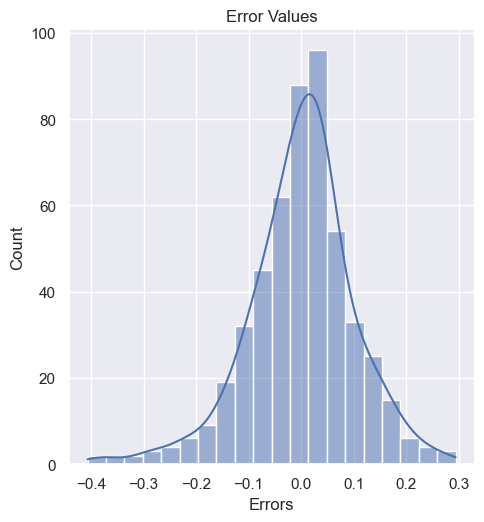

In [98]:
# Plot the histogram of the error terms
fig = plt.figure()
g = sns.displot((y_train - y_train_pred), kde = True, bins = 20).set(title='Error Values')
plt.xlabel('Errors', fontsize = 12)   # X-label name
plt.show()

The error values are normally distributed as visualized by the graph above. 

### Using the final model 3 for making predictions

- We will need to first assess the various datasets which we will use for the model
- After that we need to scale the test dataset similar to what was done for the train
- For scaling we will only be performing the transform

In [99]:
# The training dataset which we use for predictions
X_train_rfe3

const  yr  holiday   temp    hum  windspeed  season_4  weathersit_3
653 1.0000   1        0 0.5099 0.5754     0.3008         1             0
576 1.0000   1        0 0.8152 0.7256     0.2647         0             0
426 1.0000   1        0 0.4424 0.6402     0.2553         0             0
728 1.0000   1        0 0.2451 0.4981     0.6631         0             0
482 1.0000   1        0 0.3957 0.5045     0.1885         0             0
..     ...  ..      ...    ...    ...        ...       ...           ...
526 1.0000   1        0 0.8245 0.6058     0.3556         0             0
578 1.0000   1        0 0.8640 0.6797     0.1871         0             0
53  1.0000   0        0 0.2026 0.4359     0.1114         0             0
350 1.0000   0        0 0.2482 0.5779     0.4318         1             0
79  1.0000   0        0 0.4627 0.7599     0.5299         0             0

[510 rows x 8 columns]

In [100]:
# The columns which need to be scaled
bike_var_num

['temp', 'hum', 'windspeed', 'cnt']

In [101]:
df_test

yr  holiday  workingday    temp     hum  windspeed   cnt  season_2  \
184   0        1           0 29.7933 63.7917     5.4591  6043         0   
535   1        0           1 32.0825 59.2083     7.6254  6211         1   
299   0        0           1 19.2700 81.2917    13.2501  2659         0   
221   0        0           1 31.4333 42.4167    13.4173  4780         0   
152   0        0           1 29.3150 30.5000    19.5832  4968         1   
..   ..      ...         ...     ...     ...        ...   ...       ...   
400   1        0           0 10.8992 68.7917    11.7917  2947         0   
702   1        0           1 19.5092 73.3750    11.6666  6606         0   
127   0        0           0 21.6617 63.1667     5.0007  4333         1   
640   1        0           1 26.9575 79.3750     4.4586  7572         0   
72    0        0           1 13.3339 49.6957     9.1740  2046         0   

     season_3  season_4  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         1         0  ...        0        0          1          0   
535         0         0  ...        0        0          0          0   
299         0         1  ...        0        0          0          0   
221         1         0  ...        0        0          0          0   
152         0         0  ...        0        0          0          0   
..        ...       ...  ...      ...      ...        ...        ...   
400         0         0  ...        0        0          0          0   
702         0         1  ...        0        1          0          1   
127         0         0  ...        0        0          0          0   
640         0         1  ...        0        0          0          0   
72          0         0  ...        0        0          1          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          0          0          0          0             1             0  
535          1          0          0          0             0             0  
299          0          1          0          0             1             0  
221          1          0          0          0             0             0  
152          0          1          0          0             0             0  
..         ...        ...        ...        ...           ...           ...  
400          0          0          0          0             1             0  
702          0          0          0          0             0             0  
127          0          0          0          0             0             0  
640          1          0          0          0             1             0  
72           0          0          0          0             0             0  

[219 rows x 29 columns]

In [102]:
df_test[bike_var_num] = scaler.transform(df_test[bike_var_num])

In [103]:
df_test

yr  holiday  workingday   temp    hum  windspeed    cnt  season_2  \
184   0        1           0 0.8318 0.6574     0.0842 0.6927         0   
535   1        0           1 0.9014 0.6101     0.1537 0.7120         1   
299   0        0           1 0.5120 0.8377     0.3342 0.3034         0   
221   0        0           1 0.8816 0.4371     0.3396 0.5474         0   
152   0        0           1 0.8172 0.3143     0.5374 0.5690         1   
..   ..      ...         ...    ...    ...        ...    ...       ...   
400   1        0           0 0.2576 0.7089     0.2874 0.3365         0   
702   1        0           1 0.5192 0.7561     0.2834 0.7575         0   
127   0        0           0 0.5846 0.6509     0.0695 0.4960         1   
640   1        0           1 0.7456 0.8179     0.0521 0.8686         0   
72    0        0           1 0.3316 0.5121     0.2034 0.2329         0   

     season_3  season_4  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         1         0  ...        0        0          1          0   
535         0         0  ...        0        0          0          0   
299         0         1  ...        0        0          0          0   
221         1         0  ...        0        0          0          0   
152         0         0  ...        0        0          0          0   
..        ...       ...  ...      ...      ...        ...        ...   
400         0         0  ...        0        0          0          0   
702         0         1  ...        0        1          0          1   
127         0         0  ...        0        0          0          0   
640         0         1  ...        0        0          0          0   
72          0         0  ...        0        0          1          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          0          0          0          0             1             0  
535          1          0          0          0             0             0  
299          0          1          0          0             1             0  
221          1          0          0          0             0             0  
152          0          1          0          0             0             0  
..         ...        ...        ...        ...           ...           ...  
400          0          0          0          0             1             0  
702          0          0          0          0             0             0  
127          0          0          0          0             0             0  
640          1          0          0          0             1             0  
72           0          0          0          0             0             0  

[219 rows x 29 columns]

In [104]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [105]:
# Check the columns which are used in the final third model
col_rfe3_fin = X_train_rfe3.columns
col_rfe3_fin

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_4',
       'weathersit_3'],
      dtype='object')

In [106]:
# Create a test dataset for X with the columns which are defined as per the final model
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe3 = X_test[col2]

In [107]:
X_test_rfe3

yr  holiday  workingday   temp    hum  windspeed  season_4  weekday_1  \
184   0        1           0 0.8318 0.6574     0.0842         0          1   
535   1        0           1 0.9014 0.6101     0.1537         0          0   
299   0        0           1 0.5120 0.8377     0.3342         1          0   
221   0        0           1 0.8816 0.4371     0.3396         0          0   
152   0        0           1 0.8172 0.3143     0.5374         0          0   
..   ..      ...         ...    ...    ...        ...       ...        ...   
400   1        0           0 0.2576 0.7089     0.2874         0          0   
702   1        0           1 0.5192 0.7561     0.2834         1          0   
127   0        0           0 0.5846 0.6509     0.0695         0          0   
640   1        0           1 0.7456 0.8179     0.0521         1          0   
72    0        0           1 0.3316 0.5121     0.2034         0          1   

     weekday_2  weekday_3  weekday_4  weekday_5  weathersit_3  
184          0          0          0          0             0  
535          0          1          0          0             0  
299          0          0          1          0             0  
221          0          1          0          0             0  
152          0          0          1          0             0  
..         ...        ...        ...        ...           ...  
400          0          0          0          0             0  
702          1          0          0          0             0  
127          0          0          0          0             0  
640          0          1          0          0             0  
72           0          0          0          0             0  

[219 rows x 13 columns]

In [108]:
# Let's drop the 'workingday','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5' column
# as done befoire for test
X_test_rfe3.drop(['workingday','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'], axis=1,inplace=True)
X_test_rfe3

yr  holiday   temp    hum  windspeed  season_4  weathersit_3
184   0        1 0.8318 0.6574     0.0842         0             0
535   1        0 0.9014 0.6101     0.1537         0             0
299   0        0 0.5120 0.8377     0.3342         1             0
221   0        0 0.8816 0.4371     0.3396         0             0
152   0        0 0.8172 0.3143     0.5374         0             0
..   ..      ...    ...    ...        ...       ...           ...
400   1        0 0.2576 0.7089     0.2874         0             0
702   1        0 0.5192 0.7561     0.2834         1             0
127   0        0 0.5846 0.6509     0.0695         0             0
640   1        0 0.7456 0.8179     0.0521         1             0
72    0        0 0.3316 0.5121     0.2034         0             0

[219 rows x 7 columns]

In [109]:
# Add a constant to test dataset
X_test_rfe3 = sm.add_constant(X_test_rfe3)

# Perform the predictions
y_pred = lm3.predict(X_test_rfe3)

In [110]:
y_pred

184   0.5132
535   0.8736
299   0.4309
221   0.6412
152   0.5932
       ...  
400   0.4212
702   0.6916
127   0.4543
640   0.8621
72    0.3041
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

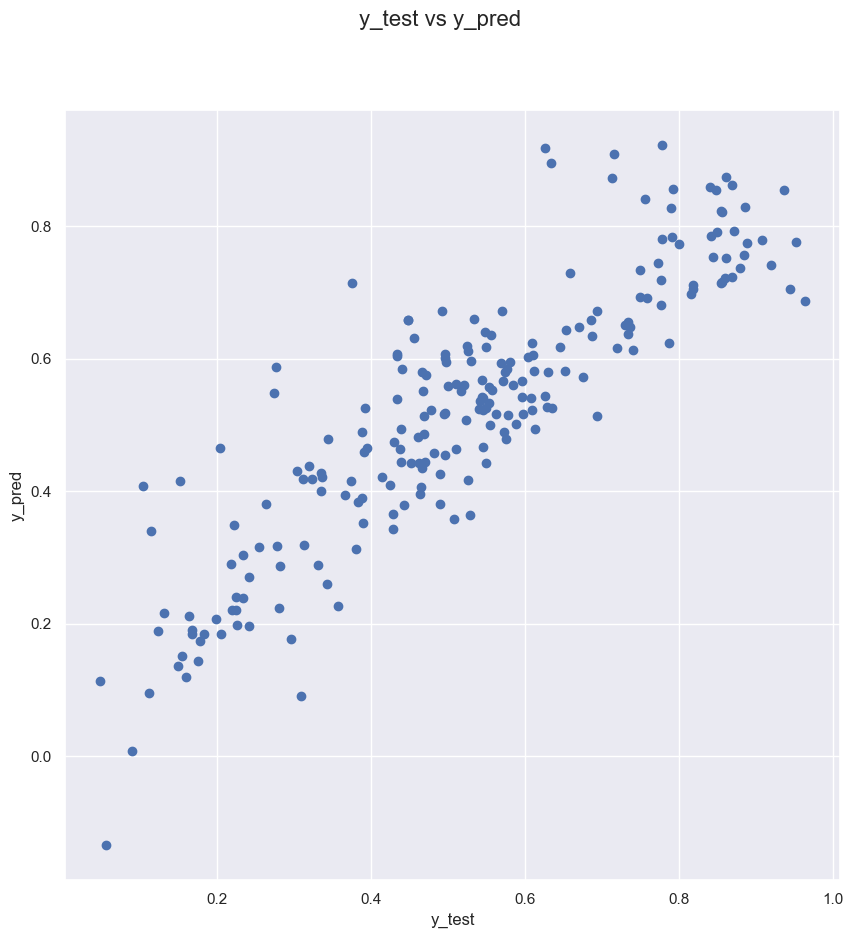

In [111]:
# Plotting y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16) # Plot heading              
plt.xlabel('y_test', fontsize = 12) # X-label                         
plt.ylabel('y_pred', fontsize = 12) # y-label  

From the plot we can see that the model is doing well with the test data. On the upper quadrant there are some values, but they are nott off

In [112]:
# r2_score for final model rfe3 with the 7 variables
r2_score(y_test, y_pred)

0.7718578756514858

In [113]:
#display adjusted R-squared
X = X_test_rfe3
y = X_test_rfe3
r2 = r2_score(y_test, y_pred)
1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7631667471048758

The final model based on rfe3 with 7 variables is the simplest model which was built. The model can be refined further but it would be very time consuming and the benefits would be limited. The the r-squared on training data is 79.8% whereas for the test data is 77.19%. The adjusted R2 is also at 76.31%.